# **M Anwaar Khan Niazi**
# **BS: Data Science**

# **Eye Disease Classified RNN**

## **About dataset** 

### **Summary**

Our eyes are one of the most important senses that help us to make contact with each other and allow us to see the beauty and abomination around us. Eyes are susceptible to diseases. Eye diseases include Glaucoma, Diabetic retinopathy, and Cataracts.Early diagnosis and treatment of eye diseases can preserve eyesight.**

### **Eye Diseases**

**Glaucoma:** Group of eye diseases that can damage the optic nerve. The optic nerve is responsible for transmitting visual information from the eye to the brain. Glaucoma can lead to permanent vision loss and, in some cases, blindness.

**Diabetic retinopathy:** It's an eye condition that affects people with diabetes. High blood sugar leaves damaged vessels in the retina. The retina is that part of your eyes that can detect light and send signals to the brain. Damage to these blood vessels can lead to vision loss and blindness in some cases.

**Cataracts:** Cataracts cloud the natural eye lens, leading to blurry vision and difficulty seeing clearly. Aging is one of the main reasons for this disease, but it can also be caused by factors such as injury, genetics, or medication effects. Cataracts can make natural vision blurry, cloudy, and even double it.

### **About RNNs**

### **Recurrent Neural Networks (RNNs)**

RNNs are a type of deep learning architecture widely used for processing sequential data. They excel at capturing temporal dependencies and have applications in various domains.

### **How RNNs Work** 

RNNs mimic the human brain's ability to process and understand sequential information. They introduce recurrent connections within the network, allowing information to persist and be passed from one step to another within the sequence.

RNNs process sequential data step by step, considering the context of previous steps while analyzing the current step. At each step, the network takes an input and combines it with the hidden state from the previous step to generate an output and update the hidden state for the next step.

### **Applications of RNNs** 

**Natural Language Processing (NLP):** RNNs can process and generate human language, making them useful for tasks like language modeling, sentiment analysis, and machine translation.

**Speech Recognition:** RNNs are employed in speech recognition systems to convert spoken language into written text.

**Time Series Analysis:** RNNs can analyze and predict patterns in time-dependent data, making them valuable for tasks such as stock market forecasting or weather prediction.

# **Libraries**

In [1]:
import os
import cv2
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Corrected import statement
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

# **Preprocessing**

In [2]:
# Define rescaling layer
rescale = tf.keras.layers.Rescaling(1./255)

# Load train dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory="E:\dataset",
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode='categorical',  # Assuming you have multiple classes
)

# Preprocess train dataset (rescale)
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

# Load validation dataset
validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory="E:\dataset",
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode='categorical',  # Assuming you have multiple classes
)

# Preprocess validation dataset (rescale)
validation_ds = validation_ds.map(lambda x, y: (rescale(x), y))

# Load test dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory="E:\dataset",  # Specify the directory for the test dataset
    batch_size=32,
    image_size=(256, 256),
    label_mode='categorical',  # Assuming you have multiple classes
    shuffle=False,
)

# Preprocess test dataset (rescale)
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

Found 4217 files belonging to 4 classes.
Using 3374 files for training.
Found 4217 files belonging to 4 classes.
Using 843 files for validation.
Found 4217 files belonging to 4 classes.


# **Check Shape After Preprocessing**

In [3]:
# Check the first image shape in the training dataset
print("Shape of the first image in the training dataset:", next(iter(train_ds))[0][0].shape)
# Check the first image shape in the validation dataset
print("Shape of the first image in the validation dataset:", next(iter(validation_ds))[0][0].shape)
# Check the first image shape in the test dataset
print("Shape of the first image in the test dataset:", next(iter(test_ds))[0][0].shape)

Shape of the first image in the training dataset: (256, 256, 3)
Shape of the first image in the validation dataset: (256, 256, 3)
Shape of the first image in the test dataset: (256, 256, 3)


# **Check Pixel Value After Preprocessing**

In [4]:
# Initialize variables to store minimum and maximum pixel values
min_pixel_value = float('inf')
max_pixel_value = float('-inf')

# Iterate through the dataset
for images, _ in train_ds:
    # Compute the minimum and maximum pixel values in the current batch of images
    batch_min = tf.reduce_min(images)
    batch_max = tf.reduce_max(images)
    
    # Update overall minimum and maximum pixel values
    min_pixel_value = tf.minimum(min_pixel_value, batch_min)
    max_pixel_value = tf.maximum(max_pixel_value, batch_max)

# Print the minimum and maximum pixel values
print("Minimum pixel value:", min_pixel_value.numpy())
print("Maximum pixel value:", max_pixel_value.numpy())

Minimum pixel value: 0.0
Maximum pixel value: 1.0


# **Visualization**

In [5]:
def visualize_images(path, target_size=(256, 256), num_images=5):

    # Get a list of image filenames
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    if not image_filenames:
        raise ValueError("No images found in the specified path")

    # Select random images
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))

    # Create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')

    # Display each image
    for i, image_filename in enumerate(selected_images):
        # Load image and resize
        image_path = os.path.join(path, image_filename)
        image = Image.open(image_path)
        image = image.resize(target_size)

        # Display image
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

## **Cataract**

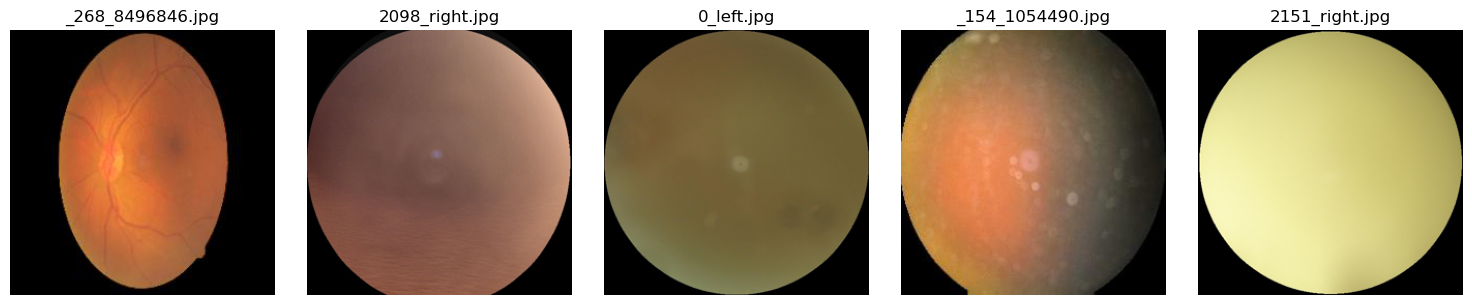

In [6]:
# Specify the path containing the images to visualize
path_to_visualize = "E:/dataset/cataract"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

## **Diabetic-Retinopathy**

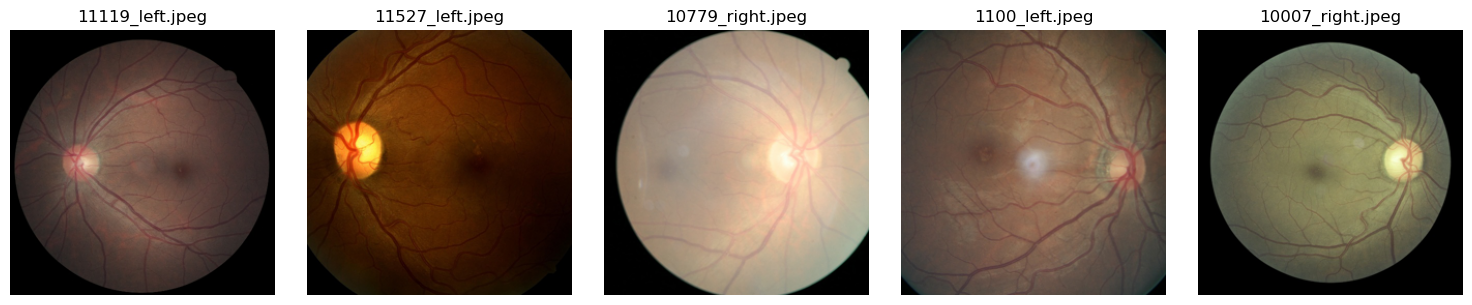

In [7]:
# Specify the path containing the images to visualize
path_to_visualize = "E:/dataset/diabetic_retinopathy"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

## **Glaucoma**

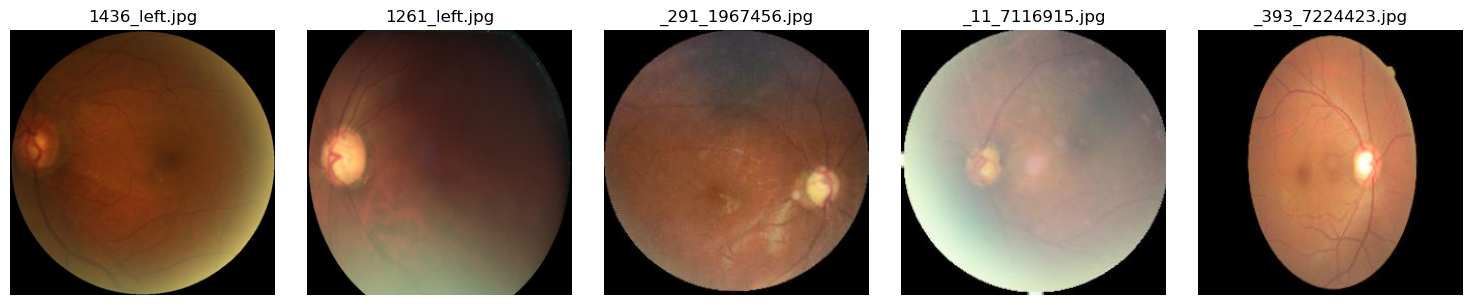

In [8]:
# Specify the path containing the images to visualize
path_to_visualize = "E:/dataset/glaucoma"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

## **Normal**

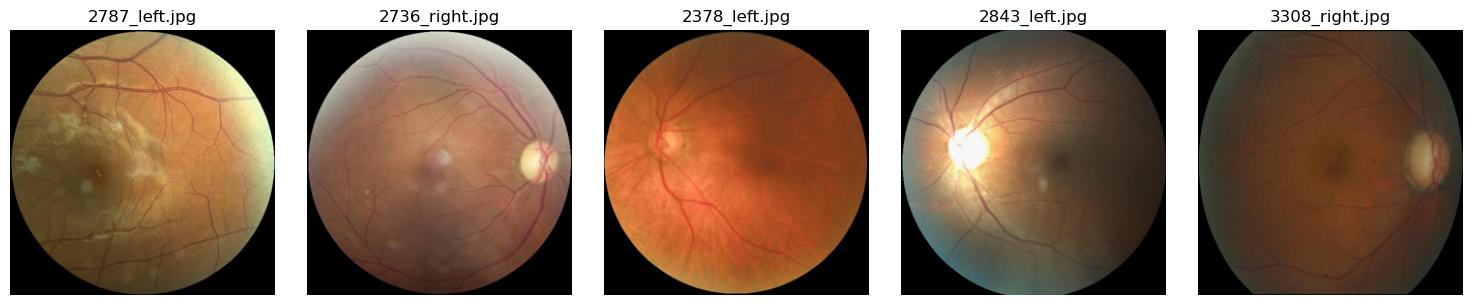

In [9]:
# Specify the path containing the images to visualize
path_to_visualize = "E:/dataset/normal"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

# **Model**

## **Build Model & Check Summary**

In [10]:
# Define RNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Reshape((64, 1)),  # Reshape for RNN input
    tf.keras.layers.SimpleRNN(32),  # Simple RNN layer
    tf.keras.layers.Dense(4, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       3,686,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 64, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 32)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,744,004 (14.28 MB)

 Trainable params: 3,744,004 (14.28 MB)

 Non-trainable params: 0 (0.00 B)

None


## **Fit Model**

In [11]:
# Define early stopping callback
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Fit the model with callbacks
history = model.fit(train_ds,
                    validation_data=validation_ds,
                    epochs=5,
                    callbacks=[early_stopping])

Epoch 1/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.4684 - loss: 1.1550 - val_accuracy: 0.6702 - val_loss: 0.7469
Epoch 2/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.6941 - loss: 0.7094 - val_accuracy: 0.7129 - val_loss: 0.6502
Epoch 3/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.7339 - loss: 0.6226 - val_accuracy: 0.7556 - val_loss: 0.5738
Epoch 4/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.7629 - loss: 0.5597 - val_accuracy: 0.7319 - val_loss: 0.6085
Epoch 5/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.7785 - loss: 0.5172 - val_accuracy: 0.7497 - val_loss: 0.5625


## **Evaluate Model**

In [12]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_ds)
print("Test accuracy:", test_accuracy)

132/132 ━━━━━━━━━━━━━━━━━━━━ 45s 339ms/step - accuracy: 0.5511 - loss: 0.8858
Test accuracy: 0.7540906071662903


# **History Plot**

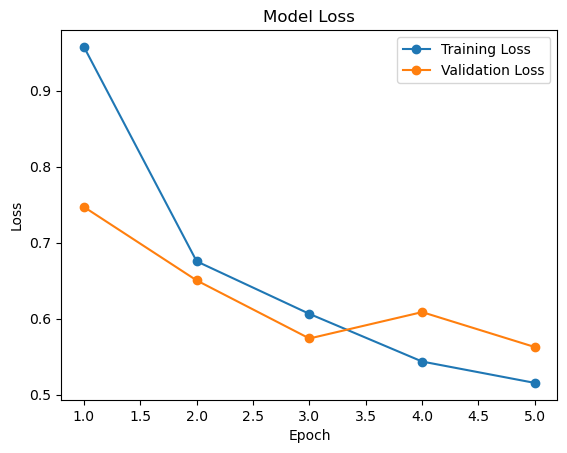

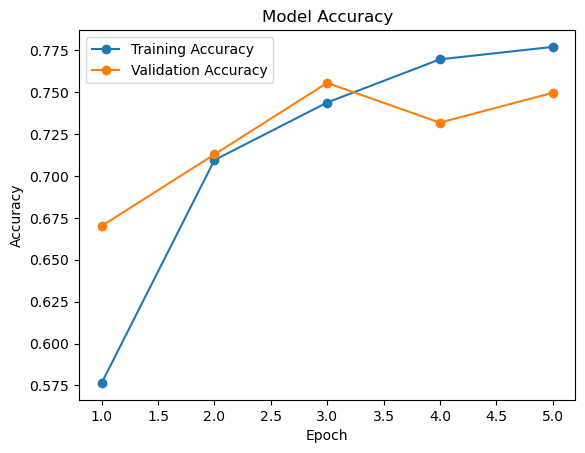

In [13]:
# Define epochs
epochs = range(1, len(history.history['loss']) + 1)

# Plot training & validation loss
plt.plot(epochs, history.history['loss'], label='Training Loss', marker='o')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()